<a href="https://colab.research.google.com/github/hbhb0311/LikelionStudy/blob/main/4.NLP/5.Chatbot_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SimpleRNN

#### 예제1

In [1]:
import numpy as np

X = []
Y = []

for i in range(6):
  lst = list(range(i, i+4)) # 길이가 4인 리스트 생성
  X.append(list(map(lambda c: [c/10], lst))) 
  # map(함수, 리스트) : 리스트의 모든 요소들을 함수를 거친 결과를 반환
  Y.append((i+4) / 10)

X = np.array(X)
Y = np.array(Y)

for i in range(len(X)):
  print(X[i], Y[i])

print(X.shape)
print(Y.shape)

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9
(6, 4, 1)
(6,)


In [2]:
# 모델 구성
import tensorflow as tf
model = tf.keras.models.Sequential([
                tf.keras.layers.SimpleRNN(units = 10, return_sequences = False, input_shape = [4, 1]),
                tf.keras.layers.Dense(1) # y값의 차원 : 1차원
])

model.compile(optimizer = 'adam', loss = 'mse')

# 모델 학습
model.fit(X, Y, epochs = 10)

# 모델 저장
model.save('simplernn.h5')

# 모델 이용해 예측
print(model.predict(X))

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.0072
Epoch 2/10
1/1 [==============================] - 0s 13ms/step - loss: 0.0048
Epoch 3/10
1/1 [==============================] - 0s 15ms/step - loss: 0.0032
Epoch 4/10
1/1 [==============================] - 0s 13ms/step - loss: 0.0023
Epoch 5/10
1/1 [==============================] - 0s 17ms/step - loss: 0.0020
Epoch 6/10
1/1 [==============================] - 0s 11ms/step - loss: 0.0022
Epoch 7/10
1/1 [==============================] - 0s 18ms/step - loss: 0.0024
Epoch 8/10
1/1 [==============================] - 0s 14ms/step - loss: 0.0026
Epoch 9/10
1/1 [==============================] - 0s 15ms/step - loss: 0.0026
Epoch 10/10
1/1 [==============================] - 0s 12ms/step - loss: 0.0025
[[0.31098264]
 [0.43846253]
 [0.56306946]
 [0.6824204 ]
 [0.7946234 ]
 [0.8986153 ]]


#### 예제 2 - sine

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.models import Sequential

In [4]:
# sine 함수 학습 데이터 생성
x = [i for i in np.arange(-10, 10, 0.1)]
train_y = [np.sin(i) for i in x]
# [np.sin(x)] 은 length가 1임

# 하이퍼파라미터 정의
n_timesteps = 15 # n_timesteps : RNN 메모리 셀의 개수 
n_features = 1 # 입력 벡터의 차원 크기

In [5]:
def split_sequence(sequence, step):
  x, y = list(), list()

  for i in range(len(sequence)):
    end_idx = i + step
    if end_idx > len(sequence) - 1:
      break
    
    seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
    x.append(seq_x)
    y.append(seq_y)

  return np.array(x), np.array(y)

In [6]:
# 시퀀스 나누기 
train_x, train_y = split_sequence(train_y, n_timesteps)
print('shape x: {} / y: {}'.format(train_x.shape, train_y.shape))

shape x: (185, 15) / y: (185,)


In [7]:
# 케라스에서 RNN 계층을 사용하려면 3차원 텐서 형태여야 함 
# 따라서 2차원인 train_x를 3차원(batch size, timesteps, input_length)으로 변환
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)

In [8]:
train_x.shape

(185, 15, 1)

In [9]:
# RNN 모델 정의
model = Sequential()
model.add(SimpleRNN(units = 10, return_sequences = False, input_shape = (n_timesteps, n_features))) # train_x.shape = (185,15,1)
# return_sequences = True인 경우 모든 RNN 계산 과정에서 결과를 출력
# 따라서 다층 구조의 RNN 모델이나 출력이 여러개인 one-to-many, many-to-many 구조에서 사용
model.add(Dense(1))

# 모델 구성
model.compile(optimizer = 'adam', loss = 'mse')

# 모델 학습
np.random.seed(1)
# earlystopping 설정
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'loss', patience = 5, mode = 'auto')
history = model.fit(train_x, train_y, epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
6/6 [==============================] - 1s 16ms/step - loss: 0.0981
Epoch 2/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.0576
Epoch 3/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.0321
Epoch 4/1000
6/6 [==============================] - 0s 22ms/step - loss: 0.0192
Epoch 5/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.0153
Epoch 6/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.0144
Epoch 7/1000
6/6 [==============================] - 0s 19ms/step - loss: 0.0130
Epoch 8/1000
6/6 [==============================] - 0s 17ms/step - loss: 0.0111
Epoch 9/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.0096
Epoch 10/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.0087
Epoch 11/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.0079
Epoch 12/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.0071
Epoch 13/1000
6/6 [==================

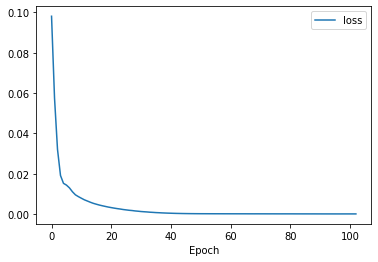

In [10]:
# loss 시각화
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [11]:
# 테스트 데이터셋 생성
test_x = np.arange(10, 20, 0.1)
calc_y = np.cos(test_x)

In [12]:
calc_y[:15]

array([-0.83907153, -0.78056818, -0.71426565, -0.64082642, -0.56098426,
       -0.47553693, -0.38533819, -0.29128928, -0.19432991, -0.09542885,
        0.0044257 ,  0.10423603,  0.20300486,  0.29974534,  0.39349087])

In [13]:
# RNN 모델 예측 및 로그 저장
test_y = calc_y[:n_timesteps]
# 1. 처음엔 실제값을 n_timesteps 만큼 가져옴

for i in range(len(test_x) - n_timesteps): 
  net_input = test_y[i:i+n_timesteps]
  net_input = net_input.reshape((1, n_timesteps, n_features))

  train_y = model.predict(net_input) # 2. n_timesteps개의 실제값으로 예측값 1개 만듦
  # 4. 1cycle을 돌고 나면 실제값 n_timesteps개와 예측값 1개로 또 새로운 예측값 생성 
  # 이렇게 에측값을 계속 늘려가면서 예측하는 것임 -> 결국 test_y에는 예측값들로 거의 이루어짐

  test_y = np.append(test_y, train_y) # 3. 예측값 1개 추가해줌

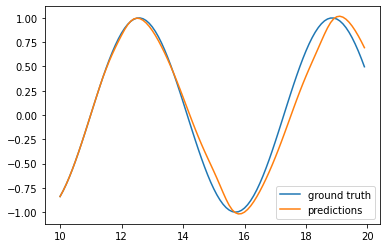

In [14]:
# 예측 결과 시각화
plt.plot(test_x, calc_y, label = 'ground truth')
plt.plot(test_x, test_y, label = 'predictions')
plt.legend()
plt.show()

## LSTM

In [15]:
import numpy as np

# 곱셈 문제 데이터 설정
X = []
Y = []

for i in range(3000):
  lst = np.random.rand(100) # 0과 1사이의 수를 100개 만듦
  idx = np.random.choice(100, 2, replace = False) # 0~99까지의 수 중 2개를 뽑음 replace = False : 같은 숫자가 다시 또 뽑히지 않음
  zeros = np.zeros(100)
  zeros[idx] = 1
  X.append(np.array(list(zip(zeros, lst)))) # zip : 동일한 개수로 이루어진 자료형을 묶어줌
  Y.append(np.prod(lst[idx]))

print(X[0], Y[0])

[[0.00000000e+00 4.17022005e-01]
 [0.00000000e+00 7.20324493e-01]
 [0.00000000e+00 1.14374817e-04]
 [0.00000000e+00 3.02332573e-01]
 [0.00000000e+00 1.46755891e-01]
 [0.00000000e+00 9.23385948e-02]
 [0.00000000e+00 1.86260211e-01]
 [0.00000000e+00 3.45560727e-01]
 [0.00000000e+00 3.96767474e-01]
 [0.00000000e+00 5.38816734e-01]
 [0.00000000e+00 4.19194514e-01]
 [0.00000000e+00 6.85219500e-01]
 [0.00000000e+00 2.04452250e-01]
 [0.00000000e+00 8.78117436e-01]
 [0.00000000e+00 2.73875932e-02]
 [0.00000000e+00 6.70467510e-01]
 [0.00000000e+00 4.17304802e-01]
 [0.00000000e+00 5.58689828e-01]
 [0.00000000e+00 1.40386939e-01]
 [0.00000000e+00 1.98101489e-01]
 [0.00000000e+00 8.00744569e-01]
 [0.00000000e+00 9.68261576e-01]
 [0.00000000e+00 3.13424178e-01]
 [0.00000000e+00 6.92322616e-01]
 [0.00000000e+00 8.76389152e-01]
 [0.00000000e+00 8.94606664e-01]
 [1.00000000e+00 8.50442114e-02]
 [0.00000000e+00 3.90547832e-02]
 [0.00000000e+00 1.69830420e-01]
 [0.00000000e+00 8.78142503e-01]
 [0.000000

In [16]:
# SimpleRNN 레이어를 사용한 곱셈 문제 모델 정의
import tensorflow as tf

model = tf.keras.models.Sequential([
        tf.keras.layers.SimpleRNN(units = 30, return_sequences = True, input_shape = [100,2]),
        tf.keras.layers.SimpleRNN(units = 30),
        tf.keras.layers.Dense(1)              
])

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 학습(SimpleRNN은 학습시간이 오래 걸리기 때문에 GPU 사용하길 권장)
X = np.array(X)
Y = np.array(Y)

history = model.fit(X[:2560], Y[:2560], epochs = 100, validation_split = 0.2)

Epoch 1/100
64/64 [==============================] - 11s 157ms/step - loss: 0.2056 - val_loss: 0.0552
Epoch 2/100
64/64 [==============================] - 10s 152ms/step - loss: 0.0529 - val_loss: 0.0483
Epoch 3/100
64/64 [==============================] - 9s 148ms/step - loss: 0.0503 - val_loss: 0.0469
Epoch 4/100
64/64 [==============================] - 10s 159ms/step - loss: 0.0485 - val_loss: 0.0477
Epoch 5/100
64/64 [==============================] - 9s 147ms/step - loss: 0.0483 - val_loss: 0.0462
Epoch 6/100
64/64 [==============================] - 9s 148ms/step - loss: 0.0486 - val_loss: 0.0455
Epoch 7/100
64/64 [==============================] - 10s 157ms/step - loss: 0.0476 - val_loss: 0.0451
Epoch 8/100
64/64 [==============================] - 9s 148ms/step - loss: 0.0478 - val_loss: 0.0456
Epoch 9/100
64/64 [==============================] - 10s 150ms/step - loss: 0.0479 - val_loss: 0.0459
Epoch 10/100
64/64 [==============================] - 9s 146ms/step - loss: 0.0484 - v

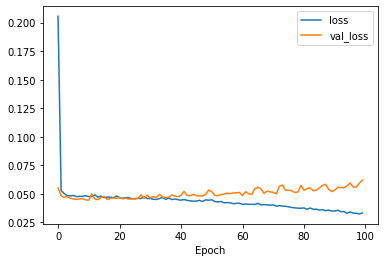

In [18]:
# 학습결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [19]:
# 오차가 0.04 이상이면 오답 처리
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5]) # 5개 테스트 데이터에 대한 예측 표시

for i in range(5):
  print(Y[2560+i], '\t', prediction[i][0], '\t diff:', abs(prediction[i][0] - Y[2560+i]))

prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0] - Y[2560+i]) > 0.04:
    fail += 1
print('correctness: ', (440 - fail) / 440 * 100, '%')

14/14 [==============================] - 1s 20ms/step - loss: 0.0615
0.5217728384005604 	 0.31915274 	 diff: 0.2026200957762776
0.38323305875161234 	 0.19911009 	 diff: 0.18412296801903788
0.1826561327780516 	 0.32827374 	 diff: 0.1456176106129854
0.017277700070884777 	 0.40963185 	 diff: 0.3923541482643813
0.0772595543966384 	 0.22759399 	 diff: 0.15033443378352213
correctness:  11.818181818181818 %


In [20]:
# LSTM 으로 풀기
model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(units = 30, return_sequences = True, input_shape = [100,2]),
        tf.keras.layers.LSTM(units = 30),
        tf.keras.layers.Dense(1)              
])

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [21]:
X = np.array(X)
Y = np.array(Y)

history = model.fit(X[:2560], Y[:2560], epochs = 100, validation_split = 0.2)

Epoch 1/100
64/64 [==============================] - 9s 59ms/step - loss: 0.0493 - val_loss: 0.0443
Epoch 2/100
64/64 [==============================] - 3s 48ms/step - loss: 0.0475 - val_loss: 0.0442
Epoch 3/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0477 - val_loss: 0.0442
Epoch 4/100
64/64 [==============================] - 3s 49ms/step - loss: 0.0473 - val_loss: 0.0445
Epoch 5/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0474 - val_loss: 0.0476
Epoch 6/100
64/64 [==============================] - 3s 48ms/step - loss: 0.0477 - val_loss: 0.0443
Epoch 7/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0472 - val_loss: 0.0445
Epoch 8/100
64/64 [==============================] - 3s 48ms/step - loss: 0.0472 - val_loss: 0.0440
Epoch 9/100
64/64 [==============================] - 3s 49ms/step - loss: 0.0472 - val_loss: 0.0444
Epoch 10/100
64/64 [==============================] - 3s 48ms/step - loss: 0.0473 - val_loss: 0.0441

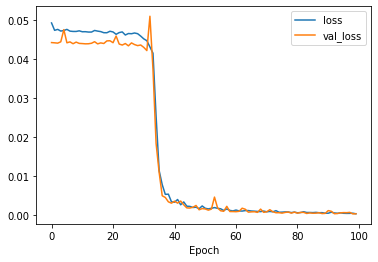

In [22]:
# 학습결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [23]:
# 오차가 0.04 이상이면 오답 처리
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5]) # 5개 테스트 데이터에 대한 예측 표시

for i in range(5):
  print(Y[2560+i], '\t', prediction[i][0], '\t diff:', abs(prediction[i][0] - Y[2560+i]))

prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0] - Y[2560+i]) > 0.04:
    fail += 1
print('correctness: ', (440 - fail) / 440 * 100, '%')

14/14 [==============================] - 1s 15ms/step - loss: 4.7176e-04
0.5217728384005604 	 0.5472313 	 diff: 0.02545847816590685
0.38323305875161234 	 0.40728596 	 diff: 0.024052899776906334
0.1826561327780516 	 0.17271188 	 diff: 0.009944253763082722
0.017277700070884777 	 0.017364264 	 diff: 8.656346366112122e-05
0.0772595543966384 	 0.05864092 	 diff: 0.018618634770879272
correctness:  92.04545454545455 %


## 긍정, 부정 감성 분석

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [25]:
#Naver Sentiment Movie Corpus v1.0 다운로드
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

4907008/4893335 [==============================] - 0s 0us/step


In [26]:
# 데이터 로드 및 확인
train_text = open(path_to_train_file, 'rb').read().decode(encoding = 'utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding = 'utf-8')

In [27]:
print(len(train_text))
print(len(test_text))

6937271
2318260


In [28]:
print(train_text[:500])

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의 긴장감을 제대로 살려내지못했다.	0
9443947	별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네	0
7156791	액션이 없는데도 재미 있는 몇안되는 영화	1
5912145	왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져


In [29]:
# 학습을 위한 정답 데이터 만들기
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
# 첫째 행은 변수명이 있기 때문에 [1:] 처리
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])

print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [30]:
# 데이터 정제
import re
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()

train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]

In [31]:
train_text_X[:10]

['아 더빙 진짜 짜증나네요 목소리',
 '흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 솔직히 재미는 없다 평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화 ! 스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화 별반개도 아까움 ',
 '원작의 긴장감을 제대로 살려내지못했다 ',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지 정말 발로해도 그것보단 낫겟다 납치 감금만반복반복 이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데 \\? 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나 \\? ']

In [32]:
sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


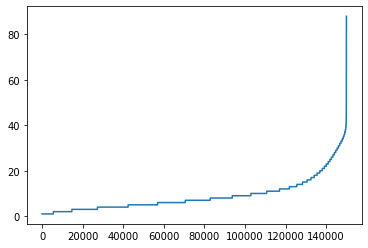

142587


In [33]:
# 각 문장의 단어 길이 확인
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=25) for l in sentence_len]))

In [34]:
# 단어의 최대 길이 조정
sentences_new = []
for sentence in sentences:
  sentences_new.append([word[:5] for word in sentence][:25]) # 문장의 길이도 25자로 통일

sentences = sentences_new

for i in range(5):
  print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [35]:
# tokenizer와 pad_sequences 사용한 전처리
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 20000)
# Tokenizer는 데이터에 출현하는 모든 단어의 개수를 세고 빈도 수로 정렬해 
# num_words에 지정된 만큼만 숫자로 반환, 나머지는 0으로 반환! 
tokenizer.fit_on_texts(sentences)
# Tokenizer에 데이터를 실제로 입력함

train_X = tokenizer.texts_to_sequences(sentences)
# 문장을 입력받아 숫자를 반환
train_X = pad_sequences(train_X, padding = 'post')
# 데이터에 패딩을 더함 

print(train_X[:5])

[[   25   884     8  5795  1111     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  588  5796  6697     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   71   346    31    35 10468     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  106  5338     4     2  2169   869   573     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


In [36]:
for i in range(1, 10):
  print(tokenizer.index_word[i])


!
,
영화
\?
너무
정말
진짜
이


In [37]:
# 감성 분석을 위한 모델 정의
model = tf.keras.models.Sequential([
                  tf.keras.layers.Embedding(20000, 300, input_length = 25),
                  tf.keras.layers.LSTM(units = 50),
                  tf.keras.layers.Dense(2, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# sparse는 y가 희소행렬일때 사용
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 300)           6000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                70200     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 102       
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 모델 학습
history = model.fit(train_X, train_Y, epochs = 5, validation_split = 0.2, batch_size = 128)

Epoch 1/5
938/938 [==============================] - 16s 15ms/step - loss: 0.4337 - accuracy: 0.7857 - val_loss: 0.3792 - val_accuracy: 0.8206
Epoch 2/5
938/938 [==============================] - 13s 14ms/step - loss: 0.3259 - accuracy: 0.8468 - val_loss: 0.3868 - val_accuracy: 0.8203
Epoch 3/5
938/938 [==============================] - 13s 14ms/step - loss: 0.2738 - accuracy: 0.8677 - val_loss: 0.4153 - val_accuracy: 0.8172
Epoch 4/5
938/938 [==============================] - 13s 14ms/step - loss: 0.2306 - accuracy: 0.8879 - val_loss: 0.4951 - val_accuracy: 0.8076
Epoch 5/5
938/938 [==============================] - 13s 14ms/step - loss: 0.1965 - accuracy: 0.9034 - val_loss: 0.5227 - val_accuracy: 0.7995


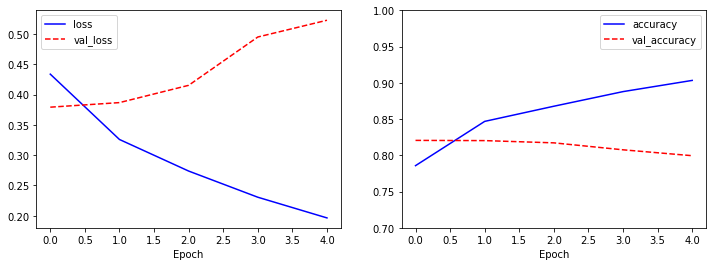

In [39]:
# 모델 학습 결과 시각화로 확인
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'b-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()
plt.show()

In [40]:
# 테스트 데이터로 평가
# Tokenizer는 훈련 데이터로만 학습 시켜야 함
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X]
sentences = [sentence.split(' ') for sentence in test_text_X]
sentences_new = []
for sentence in sentences:
  sentences_new.append([word[:5] for word in sentence][:25])

sentences = sentences_new

test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding = 'post')

model.evaluate(test_X, test_Y, verbose = 0)

[0.524860680103302, 0.7951599955558777]

In [41]:
# 임의의 문장 감성 분석 결과 확인
test_sentence = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'
test_sentence = test_sentence.split(' ')
test_sentences = []
new_sentence = []

for word in test_sentence:
  new_sentence.append(word)
  test_sentences.append(new_sentence[:])

test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding = 'post')
prediction = model.predict(test_X_1)

for idx, sentence in enumerate(test_sentences):
  print(sentence)
  print(prediction[idx])

['재미있을']
[0.49957022 0.50042975]
['재미있을', '줄']
[0.6330991 0.3669009]
['재미있을', '줄', '알았는데']
[0.6433952  0.35660478]
['재미있을', '줄', '알았는데', '완전']
[0.6339159  0.36608413]
['재미있을', '줄', '알았는데', '완전', '실망했다.']
[0.6339159  0.36608413]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무']
[0.6252859  0.37471405]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고']
[0.5860498  0.41395023]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이']
[0.52236503 0.477635  ]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
[0.52236503 0.477635  ]
